In [1]:
import matplotlib.pyplot as plt

import numpy as np
from pymoo.problems.many import DTLZ2

In [2]:
n_dim = 2
n_obj = 2
n_train = 200

problem = DTLZ2(n_var=n_dim, n_obj=n_obj)
lb, ub = problem.bounds()
ref_point = np.array([2.0] * n_obj)

X_train = np.random.uniform(lb, ub, (n_train, n_dim))
y_train = problem.evaluate(X_train)

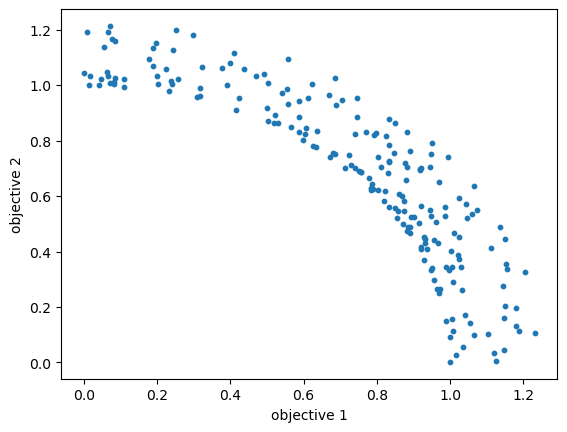

In [3]:
_, ax = plt.subplots(1, 1)

ax.scatter(y_train[:, 0], y_train[:, 1], s=10);
ax.set_xlabel("objective 1")
ax.set_ylabel("objective 2");
# ax.scatter(ref_point[0], ref_point[1], marker='*')

In [4]:
import pygmo as pg

In [5]:
ndf, _, _, _ = pg.core.fast_non_dominated_sorting(y_train)

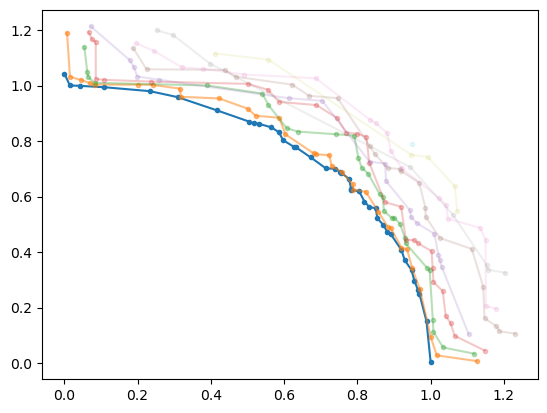

In [8]:
for n, shell in enumerate(ndf, start=1):
    sorted_idx = np.argsort(y_train[shell][:, 0])
    plt.plot(
        y_train[shell][sorted_idx][:, 0],
        y_train[shell][sorted_idx][:, 1],
        '-o',
        markersize=3,
        alpha=1/n
    )